In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from keras.layers import Dropout, Dense, GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3

# 引用多個TensorFlow和Keras庫中的模組，構建一個深度學習模型

# 定義一個訓練資料產生器 train_generator 和一個驗證資料產生器 validation_generator，並設定標籤字典 labels。

調整處理影像的參數、如每個批次包含的影像數、影像數值應該被縮放的比例、影像應該被調整的像素大小

In [4]:
batch_size=64
data_dir = "images"

train_datagen = ImageDataGenerator(rescale = 1./255,
        validation_split=0.2,
        rotation_range=35,
        width_shift_range=0.25,
        preprocessing_function=tf.keras.applications.resnet.preprocess_input,
        height_shift_range=0.25,
        shear_range=0.25,
        zoom_range=0.25,
        horizontal_flip=True,
        fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)


train_generator = train_datagen.flow_from_directory(data_dir,
    target_size=(299,299),
    class_mode='categorical',
    batch_size=batch_size,
    subset = "training")
validation_generator = validation_datagen.flow_from_directory(data_dir,
    target_size=(299,299),
    class_mode='categorical',
    batch_size=batch_size,
    subset = "validation")

labels = {v: k for k, v in train_generator.class_indices.items()}

Found 51380 images belonging to 51 classes.
Found 12845 images belonging to 51 classes.


# 載入預訓練的 InceptionV3 模型

In [5]:
pre_trained_model = InceptionV3(input_shape=(299, 299, 3), include_top=True, weights='imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

last_output = pre_trained_model.get_layer('mixed10').output

# 將 InceptionV3 模型的輸出作為以下模型的輸入，並調整此神經網路模型的參數，接著進行訓練並儲存模型

In [6]:
x = layers.Dense(512, activation='relu')(last_output)
x = layers.Dropout(0.2)(x)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(51, activation='softmax')(x)           
model = Model(pre_trained_model.input, x) 

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [8]:
model.compile(optimizer='rmsprop', 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [9]:
load_model = True
if load_model:
    model = keras.models.load_model('FinalModel.h5')

In [19]:
if not load_model:
    history = model.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=100)
    
history = model.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=3)

Epoch 1/3
803/803 [==============================] - 3431s 4s/step - loss: 0.8538 - accuracy: 0.7317 - val_loss: 0.5419 - val_accuracy: 0.8213
Epoch 2/3
803/803 [==============================] - 3377s 4s/step - loss: 0.8056 - accuracy: 0.7489 - val_loss: 0.5459 - val_accuracy: 0.8273
Epoch 3/3
803/803 [==============================] - 3631s 5s/step - loss: 0.7735 - accuracy: 0.7556 - val_loss: 0.5192 - val_accuracy: 0.8347


In [8]:
model.evaluate(validation_generator)

201/201 [==============================] - 774s 4s/step - loss: 4.1362 - accuracy: 0.0318


[4.124238014221191, 0.030984818935394287]

In [11]:
model.save('FinalModel.h5')

# 繪製Training accuracy Curve和Validation accuracy Curve

In [26]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

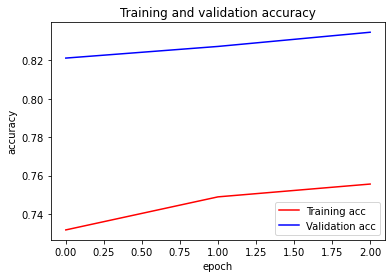

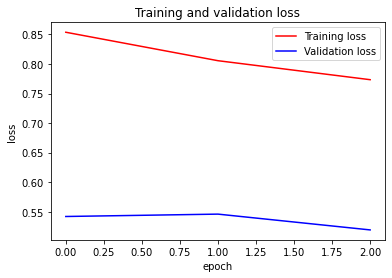

In [27]:
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

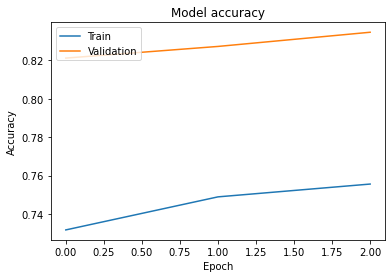

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()